Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 1s 8ms/step - loss: 1.1090 - acc: 0.3417 - val_loss: 1.1107 - val_acc: 0.3000
Epoch 2/100
120/120 [==============================] - 0s 107us/step - loss: 1.0912 - acc: 0.3417 - val_loss: 1.1027 - val_acc: 0.3000
Epoch 3/100
120/120 [==============================] - 0s 107us/step - loss: 1.0820 - acc: 0.3500 - val_loss: 1.0952 - val_acc: 0.5333
Epoch 4/100
120/120 [==============================] - 0s 101us/step - loss: 1.0715 - acc: 0.5500 - val_loss: 1.0795 - val_acc: 0.3667
Epoch 5/100
120/120 [==============================] - 0s 92us/step - loss: 1.0545 - acc: 0.4083 - val_loss: 1.0552 - val_acc: 0.5000
Epoch 6/100
120/120 [==============================] - 0s 97us/step - loss: 1.0341 - acc: 0.5750 - val_loss: 1.0351 - val_acc: 0.5667
Epoch 7/100
120/120 [==============================] - 0s 97us/step - loss: 1.0201 - acc: 0.6417 - val_loss: 1.0182 - val_acc: 0.5333
Epoch 8/100
120

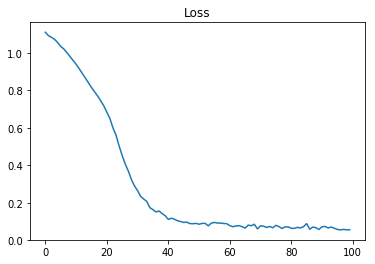

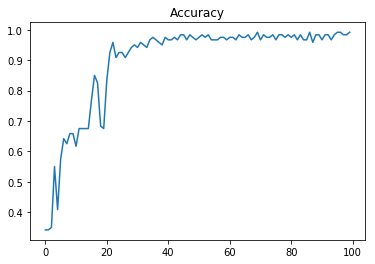

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt


# Classifications:
# 0 = Iris-setosa
# 1 = Iris-versicolor
# 2 = Iris-virginica

model = Sequential()

model.add(Dense(8, activation='relu', input_dim=4))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

data = np.genfromtxt('iris.csv', delimiter=',')

x_train = data[1:, :4]
y_train = to_categorical(data[1:, 4])

# need to add to_categorical because categorical_crossentropy requires it to be a one-hot encoded vector.
# it gives you an array with the length of possible values, i.e. we have three possible values, so the array
# will be three long. this is represented by [1, 0, 0], [0, 1, 0], or [0, 0, 1] which represent if the value was
# 0, 1, or 2.


perm = np.random.permutation(y_train.shape[0])
# randomize the data
x_train = x_train[perm]
y_train = y_train[perm]

fit = model.fit(
    x_train,
    y_train,
    epochs=100,
    validation_split=0.2,
    verbose=1
)

plt.title('Loss')
plt.plot(fit.history['loss'])
plt.show()

plt.title('Accuracy')
plt.plot(fit.history['acc'])
plt.show()

model.save("iris_network.h5")